In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Import releveant Packages
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/mental-health-in-tech-survey/survey.csv


In [2]:
df=pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')

## Dataframe

In [3]:
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.shape

(1259, 27)

## Looking for the info of dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Pop out unneccassry variables

In [6]:
df=df.drop(['comments'],axis=1)

## Checking for duplications

In [7]:
print(f'duplication in the dataframe is {sum(df.duplicated())}')

duplication in the dataframe is 0


0 values, therefore no duplications in the data. 

## Checking if there is missing value

In [8]:
if df.isna().values.any() == True:
    print(f'the dataframe contain null values, needs cleaning')
else:
    print(f'the dataframe does not contain any null values, do not need cleaning')

the dataframe contain null values, needs cleaning


In [9]:
df.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [10]:
# df.work_interfere.describe()
# df['work_interfere'].fillna(value='Sometimes', inplace=True)
df.work_interfere.isna().sum()
df.work_interfere.unique()
## change na values in work_interfere into mode value ('Sometimes')

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [11]:
df.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [12]:
# df.self_employed.describe()
df.self_employed.fillna(value='No', inplace=True)
df.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df.state.fillna(value='Unknown', inplace=True)
df.state.unique()

array(['IL', 'IN', 'Unknown', 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD',
       'NY', 'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL',
       'MN', 'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA',
       'NH', 'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI',
       'WY', 'LA', 'ME'], dtype=object)

In [14]:
df.isna().values.any()

True

In [15]:
###Gender Solution
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [16]:
repGen={'Female':'Female','M':'Male','male':'Male','Male':'Male','m':'Male','Male-ish':'Others','maile':'Male','Trans-female':'Others',
        'Cis Female':'Female','F':'Female','something kinda male?':'Others','Cis Male':'Male','Woman':'Female','f':'Female','Mal':'Male',
        'Male (CIS)':'Male','queer/she/they':'Others','non-binary':'Others','Femake':'Female','woman':'Female','Make':'Male','Nah':'Others',
        'All':'Others','Enby':'Others','fluid':'Others','Genderqueer':'Others','Female ':'Female','Androgyne':'Others','Agender':'Others',
        'cis-female/femme':'Female','Guy (-ish) ^_^':'Others','male leaning androgynous':'Others','Male ':'Male','Man':'Male','Trans woman':'Others',
        'msle':'Male','Neuter':'Others','Female (trans)':'Female','queer':'Others','Female (cis)':'Female','Mail':'Male','cis male':'Male',
        'Malr':'Male','female':'Female','p':'Others','A little about you':'Others','femail':'Female','Cis Man':'Male',
        'ostensibly male, unsure what that really means':'Others'}
df['Gender']=df.Gender.replace(repGen)
df.Gender.unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [17]:
gender_values = df.Gender.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'Gender': 'count'})
gender_values

,count
Male,990
Female,249
Others,20


## Timestamp splitting into date, time

In [18]:
df.Timestamp

0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255    2015-09-26 01:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

In [19]:
'2014-08-27 11:29:31'.split(' ')


['2014-08-27', '11:29:31']

In [20]:
Timestamp_split=df['Timestamp'].str.split(' ')
Timestamp_split

0       [2014-08-27, 11:29:31]
1       [2014-08-27, 11:29:37]
2       [2014-08-27, 11:29:44]
3       [2014-08-27, 11:29:46]
4       [2014-08-27, 11:30:22]
                 ...          
1254    [2015-09-12, 11:17:21]
1255    [2015-09-26, 01:07:35]
1256    [2015-11-07, 12:36:58]
1257    [2015-11-30, 21:25:06]
1258    [2016-02-01, 23:04:31]
Name: Timestamp, Length: 1259, dtype: object

In [21]:
Timestamp_split[0][0]

'2014-08-27'

In [22]:
Timestamp_split.str.get(0)

0       2014-08-27
1       2014-08-27
2       2014-08-27
3       2014-08-27
4       2014-08-27
           ...    
1254    2015-09-12
1255    2015-09-26
1256    2015-11-07
1257    2015-11-30
1258    2016-02-01
Name: Timestamp, Length: 1259, dtype: object

In [23]:
df['Date']=Timestamp_split.str.get(0)
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%d-%m-%Y")
df.Date
##Date table inserted and formated from yyyy-mm-dd into dd-mm-yyyy

0       27-08-2014
1       27-08-2014
2       27-08-2014
3       27-08-2014
4       27-08-2014
           ...    
1254    12-09-2015
1255    26-09-2015
1256    07-11-2015
1257    30-11-2015
1258    01-02-2016
Name: Date, Length: 1259, dtype: object

In [24]:
df['Time']=Timestamp_split.str.get(1)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Date,Time
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,27-08-2014,11:29:31
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,27-08-2014,11:29:37
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,No,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,27-08-2014,11:29:44
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,No,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,27-08-2014,11:29:46
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,27-08-2014,11:30:22


In [25]:
Date_split=df['Date'].str.split('-')
df['Year']=Date_split.str.get(2)
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Date,Time,Year
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,No,Some of them,Yes,No,Maybe,Yes,No,27-08-2014,11:29:31,2014
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,No,No,No,No,No,Don't know,No,27-08-2014,11:29:37,2014


## Relationship between variables

Text(0, 0.5, 'Number of Respondents')

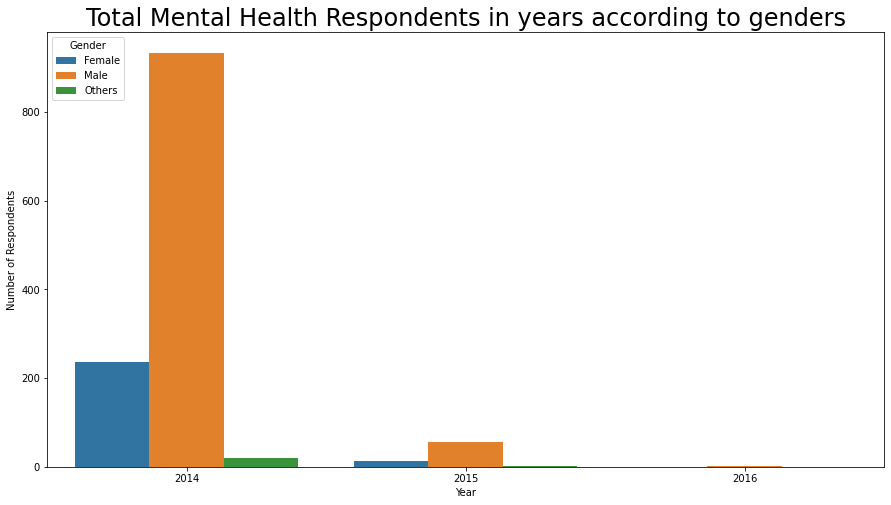

In [26]:
plt.figure(figsize = (15,8))
bar1=sns.countplot(x='Year', data=df, hue='Gender')
bar1.set_title('Total Mental Health Respondents in years according to genders',fontsize=24)
bar1.set_ylabel('Number of Respondents')

In [27]:
(df.Year == '2016').sum()

1

In [28]:
print(f'The total data in the year 2016 is {(df.Year == "2016").sum()} .')

The total data in the year 2016 is 1 .


In [29]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
Date                         object
Time                        

AxesSubplot(0.125,0.125;0.775x0.755)


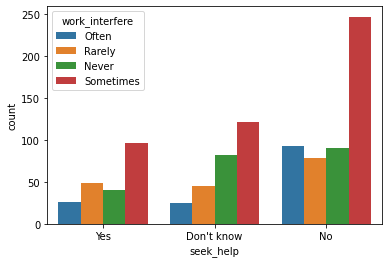

In [30]:
print(sns.countplot(x='seek_help',data=df,hue='work_interfere'))

AxesSubplot(0.125,0.125;0.775x0.755)


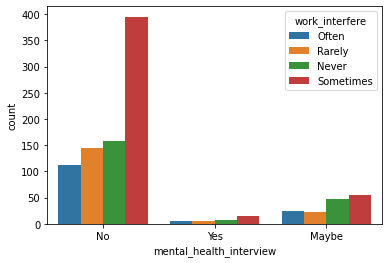

In [31]:
print(sns.countplot(x='mental_health_interview',data=df,hue='work_interfere'))

Text(0.5, 0, 'Seeking Help')

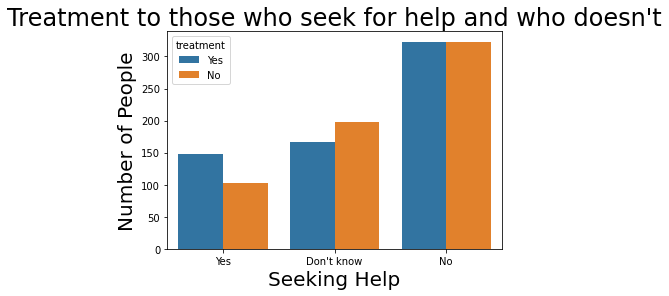

In [32]:
bar4=sns.countplot(x='seek_help',data=df,hue='treatment')
bar4.set_title("Treatment to those who seek for help and who doesn't",fontsize = 24)
bar4.set_ylabel('Number of People',fontsize = 20)
bar4.set_xlabel('Seeking Help',fontsize = 20)

In [33]:
sh_values = df.seek_help.value_counts().sort_values(ascending=False).to_frame()
sh_values = sh_values.rename(columns={'Seek Help': 'count'})
sh_values

,seek_help
No,646
Don't know,363
Yes,250


Text(0.5, 0, 'Well Program')

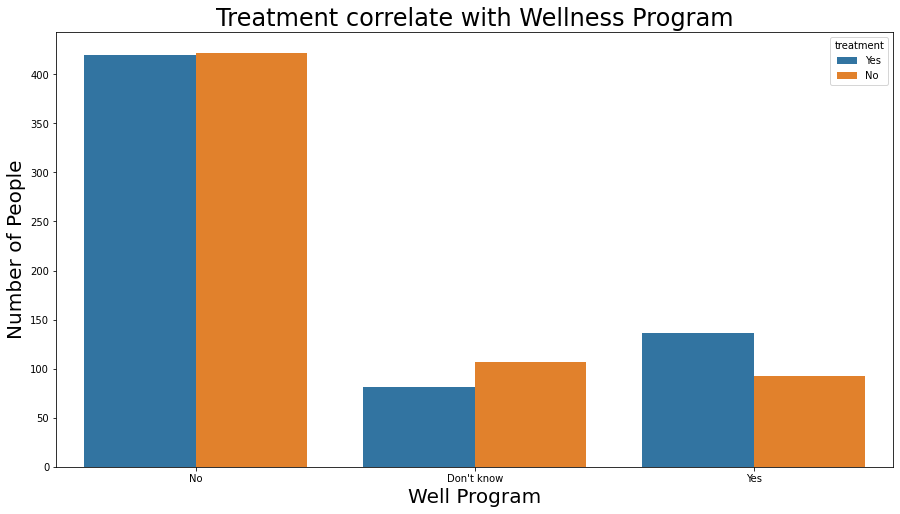

In [34]:
plt.figure(figsize = (15,8))
bar5=sns.countplot(x='wellness_program',data=df,hue='treatment')
bar5.set_title("Treatment correlate with Wellness Program",fontsize = 24)
bar5.set_ylabel('Number of People',fontsize = 20)
bar5.set_xlabel('Well Program',fontsize = 20)